In [72]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from  pmdarima.arima import auto_arima
import warnings
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 6


In [118]:
dataset = pd.read_csv('AirPassengers.csv')

In [119]:

#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
dataset.set_index('Month',inplace=True)

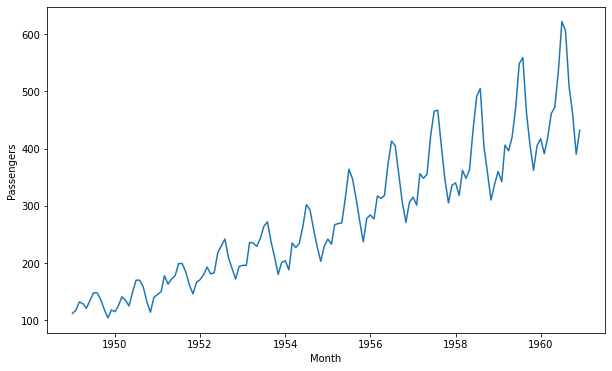

In [120]:
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.plot(dataset)

In [121]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [122]:
dataset.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [123]:
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


kiểm tra tính dừng

In [124]:
adfuller_test(dataset['Passengers'])

ADF Test Statistic : 0.8153688792060569
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


lấy sai phân

kiểm tra tính dừng

In [125]:
dataset['Difference'] = dataset['Passengers'].diff(1)

In [126]:
adfuller_test(dataset['Difference'].dropna())

ADF Test Statistic : -2.8292668241699928
p-value : 0.05421329028382636
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


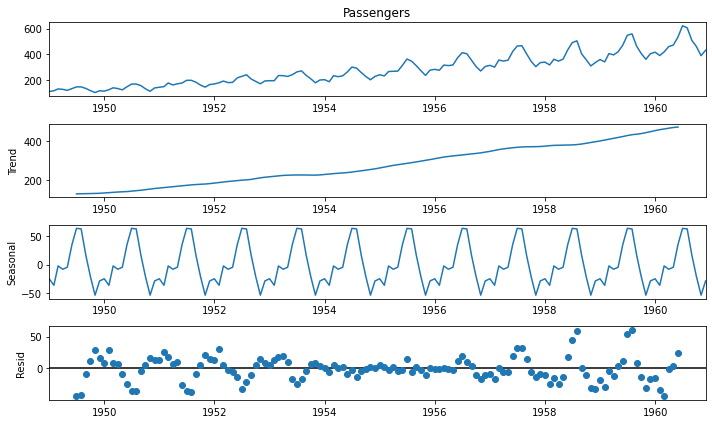

In [127]:
data_diff = dataset['Passengers'].dropna()
dec = seasonal_decompose(data_diff).plot()
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [107]:
def train_test_split(df,n):
    train = df.drop(df.tail(n).index)
    test = df.tail(n) # set one year(n months) for testing
    return train,test

In [158]:
def ARIMA_auto(train,d):

    warnings.filterwarnings("ignore")
    model_arima = auto_arima(train, start_p=0,start_q=0,d=d,
                            max_p=5,max_q=5, trace=True,
                            error_action='ignore', seasonal=True,
                            suppress_warnings=True
                            )

    print(model_arima.aic())

In [150]:
def SARIMA_auto(train,d):

    warnings.filterwarnings("ignore")
    model_arima = auto_arima(train, start_p=0,start_q=0,d=d,
                            max_p=5,max_q=5, trace=True,m=12, #m là số chu kỳ 
                            error_action='ignore', seasonal=True,
                            suppress_warnings=True
                            )

    print(model_arima.aic())

In [151]:
def ARIMA_PRED(train,test,p,d,q):

    model = sm.tsa.arima.ARIMA(train,order = (p,d,q))
    model_fit = model.fit()
    #print(model_fit.summary())
    start = len(train)
    end = len(train) + len(test) - 1
    pred = model_fit.predict(start , end )


    return pred

In [152]:
def SARIMA_PRED(train,test,p,d,q,sp,sd,sq,m):

    model = sm.tsa.arima.ARIMA(train,order = (p,d,q),seasonal_order=(sp,sd,sq,m))
    model_fit = model.fit()
    #print(model_fit.summary())
    start = len(train)
    end = len(train) + len(test) - 1
    pred = model_fit.predict(start , end )


    return pred

In [153]:
def measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.mean(e/y)
    print('Mean Square Error: {}'.format(mse))
    print('Root Mean Square Error: {}'.format(rmse))
    print('Mean Absolute Error: {}'.format(mae))
    print('Mean Absolute Percentage Error: {}'.format(mape))
    return mse, rmse, mae, mape 

sử dụng 1 năm gần nhất test

In [154]:
train,test = train_test_split(dataset['Passengers'],12)

sai phân d=2

sử dụng auto_arima để tìm tham số tốt nhất

In [155]:
SARIMA_auto(train,2)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=1004.386, Time=0.17 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1004.692, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=944.142, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=943.051, Time=0.02 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=944.269, Time=0.13 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=936.791, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=937.642, Time=0.11 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=937.877, Time=0.15 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=933.701, Time=0.05 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=935.054, Time=0.14 sec
 ARIMA(3,2,0)(0,1,1)[12]             : AIC=935.195, Time=0.17 sec
 ARIMA(3,2,0)(1,1,1)[12]             : AIC=

In [159]:
ARIMA_auto(train,2)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1311.919, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1308.152, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1302.913, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1300.282, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1280.672, Time=0.05 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1281.732, Time=0.06 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1282.663, Time=0.08 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 0.654 seconds
1280.6724859608025


ARIMA

In [161]:
pred1 = ARIMA_PRED(train,test,4,2,0)

In [162]:
mse, rmse, mae, mape= measure_metric(test, pred1)

Mean Square Error: 20759.25163553339
Root Mean Square Error: 144.08071222593742
Mean Absolute Error: 122.23377730822688
Mean Absolute Percentage Error: 0.21593690799688572


SARIMA

In [160]:
pred2 = SARIMA_PRED(train,test,5,2,0,0,1,0,12)

In [163]:
mse, rmse, mae, mape= measure_metric(test, pred2)

Mean Square Error: 2926.8296182444537
Root Mean Square Error: 54.10018131433991
Mean Absolute Error: 47.73286521355761
Mean Absolute Percentage Error: -0.10449441915738998


ARIMA

<AxesSubplot:>

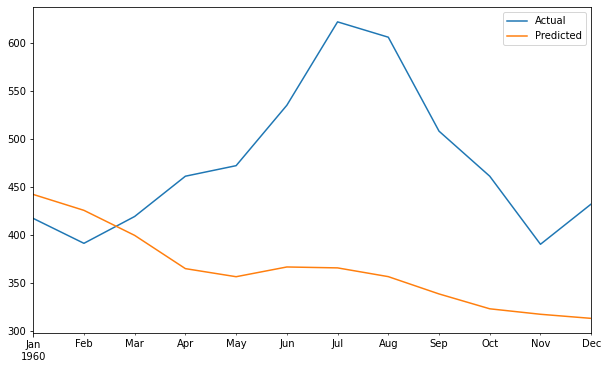

In [164]:
df = pd.DataFrame({'Actual': test, 'Predicted': pred1})
df.plot(figsize = (10,6))

SARIMA

<AxesSubplot:>

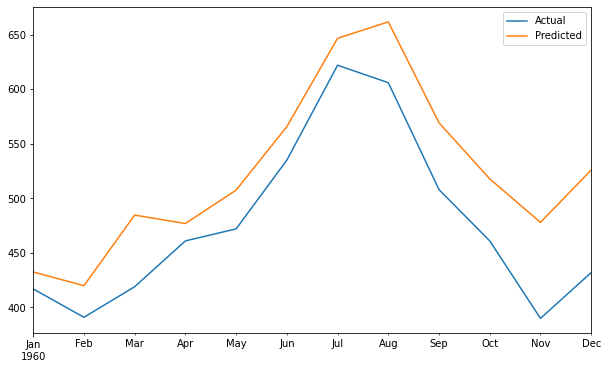

In [165]:
df = pd.DataFrame({'Actual': test, 'Predicted': pred2})
df.plot(figsize = (10,6))